In [26]:
import nibabel as nib
import numpy as np
import glob
import pandas as pd
import os

In [4]:
ground_truth_filenames = glob.glob("./preprocessed/*/*/*.nii.gz")

In [5]:
len(ground_truth_filenames)

77

In [59]:
stats = list()
for filename in sorted(ground_truth_filenames):
    image = nib.load(filename)
    zooms = image.header.get_zooms()
    data = np.asarray(image.dataobj)
    values = np.unique(data)
    n_voxels = np.sum(data > 0)
    tumor_size = n_voxels * zooms[0] * zooms[1] * zooms[2]
    subject, visit = filename.split("/")[-3:-1]
    filenames = sorted(glob.glob(os.path.join("train", subject, visit, f"*.nii*")))
    n_features = len(filenames) 
    feature_modalities = ["_".join(fn.split("_")[3:-1]) for fn in filenames]
    t1_filename = filenames[feature_modalities.index("T1_gd")]
    t1_image = nib.load(t1_filename)
    t1_data = np.asarray(t1_image.dataobj)
    stats.append([subject, visit, n_features, feature_modalities, data.shape, *["{:.2f}".format(z) for z in zooms], 
                  t1_data.max(), t1_data.min(), values.tolist(), n_voxels, tumor_size])

In [60]:
df = pd.DataFrame(stats, columns=["Subject", "Visit", "NumberOfFeatureImages", "FeatureModalities", "Size", "Spacingx", "Spacingy", "Spacingz", "T1wMax", "T1wMin", "Labels", "Voxels", "TumorSize"])

In [51]:
df.to_csv("dataset_stats.csv")

In [33]:
filenames[0].split("_")[3:-1]

['DWI', 'b0']

In [57]:
from matplotlib import pyplot as plt

(array([ 3.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0., 72.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

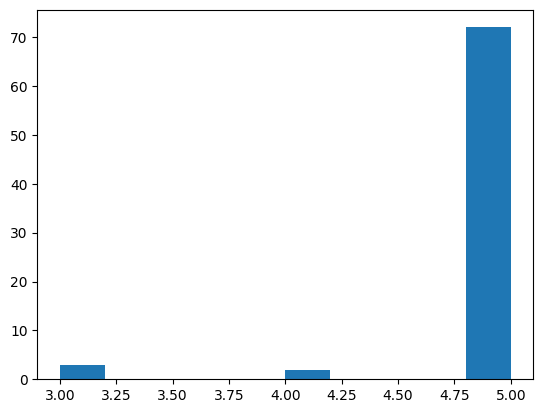

In [58]:
plt.hist(df["NumberOfFeatureImages"])

(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

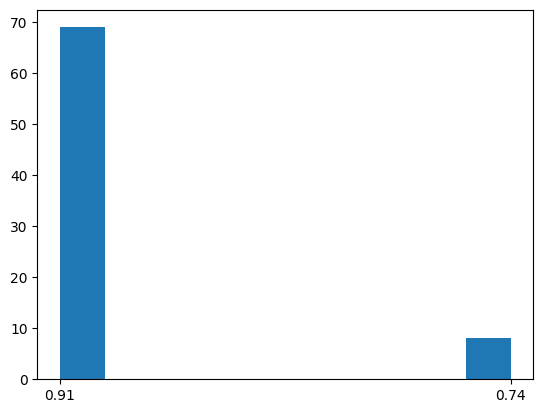

In [61]:
plt.hist(df["Spacingx"])

(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

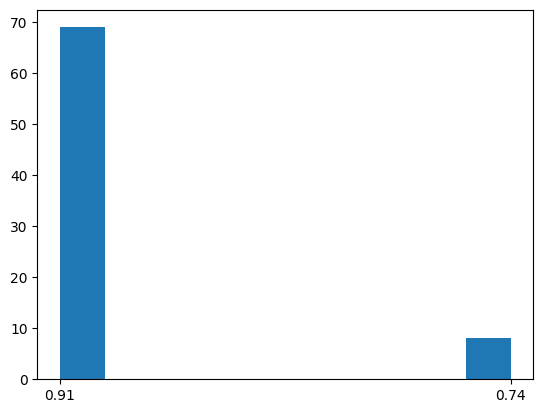

In [62]:
plt.hist(df["Spacingy"])

(array([63.,  7.,  2.,  0.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

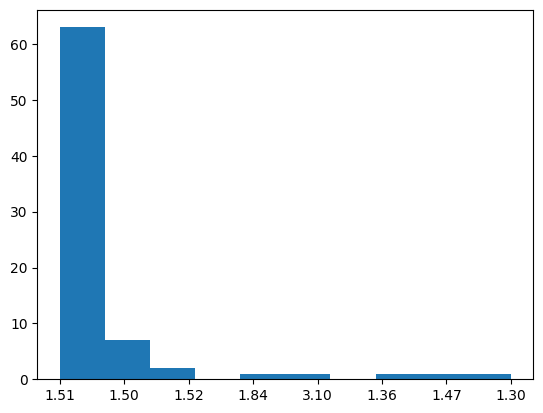

In [63]:
plt.hist(df["Spacingz"])

In [23]:
df[df.Subject == "PT_39"]

,Subject,Visit,Spacing,Values,Voxels,Size
60,PT_39,20190522,"(0.9114583, 0.91145825, 1.5095383)","[0, 1]",1771,2220.93725


In [24]:
df[df.Subject == "PT_38"]

,Subject,Visit,Spacing,Values,Voxels,Size
21,PT_38,20220408,"(0.9114583, 0.9114583, 1.5095673)","[0, 1]",17947,22507.017685
22,PT_38,20211230,"(0.9114583, 0.9114583, 1.5095559)","[0, 1]",16288,20426.341664


In [64]:
df

,Subject,Visit,NumberOfFeatureImages,FeatureModalities,Size,Spacingx,Spacingy,Spacingz,T1wMax,T1wMin,Labels,Voxels,TumorSize
0,PT_06,20180628,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(384, 384, 199)",0.91,0.91,1.51,1582,0,"[0, 1]",31306,3.925983e+04
1,PT_07,20180801,5,"[DWI_b0, DWI_b100, T1_gd, T2, NB]","(336, 336, 255)",0.74,0.74,1.50,1730,0,"[0, 1]",1158178,9.617655e+05
2,PT_07,20181109,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(336, 336, 270)",0.74,0.74,1.50,1307,0,"[0, 1]",1504984,1.249745e+06
3,PT_10,20180815,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(336, 336, 255)",0.74,0.74,1.52,2177,0,"[0, 1]",25636,2.156777e+04
4,PT_10,20190911,3,"[NB, T1_gd, T2]","(384, 384, 264)",0.91,0.91,1.51,1588,0,"[0, 1]",2035,2.552084e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,PT_86,20201008,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(384, 384, 330)",0.91,0.91,1.51,1394,0,"[0, 1]",903537,1.133104e+06
73,PT_86,20210903,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(384, 384, 330)",0.91,0.91,1.51,1667,0,"[0, 1]",54902,6.885094e+04
74,PT_86,20211029,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(384, 384, 330)",0.91,0.91,1.51,1608,0,"[0, 1]",8754,1.097811e+04
75,PT_88,20190501,5,"[DWI_b0, DWI_b100, NB, T1_gd, T2]","(384, 384, 334)",0.91,0.91,1.51,1514,0,"[0, 1]",40746,5.109828e+04
